In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [3]:
X,y = make_regression(n_samples = 100, n_features =1, n_informative =1, n_targets = 1, noise = 20, random_state = 13)

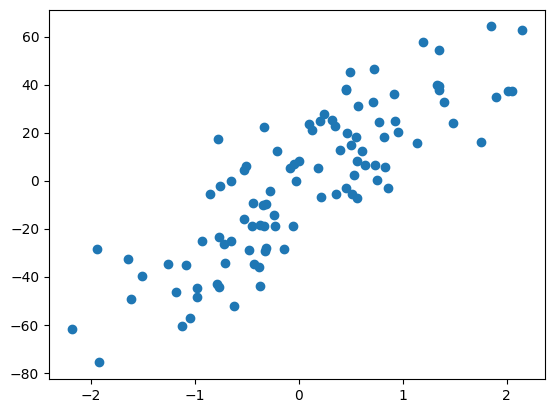

In [4]:
plt.scatter(X,y)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [7]:
from sklearn.linear_model import Ridge

In [9]:
rr = Ridge(alpha = 10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235735


In [11]:
rr1 = Ridge(alpha = 100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


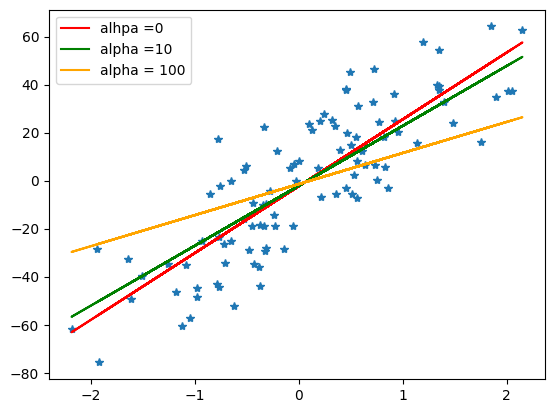

In [15]:
plt.plot(X,y,'*')
plt.plot(X,lr.predict(X),color = 'red',label = 'alhpa =0')
plt.plot(X,rr.predict(X),color = 'green',label = 'alpha =10')
plt.plot(X,rr1.predict(X),color = 'orange',label = 'alpha = 100')

plt.legend()
plt.show()

In [17]:
class MyRidge:

  def __init__(self,alpha = 0.1):
    self.alpha = alpha
    self.m = None
    self.b = None

  def fit(self,X_train, y_train):
    num = 0 #numerator value
    den = 0 #denominator value

    for i in range(X_train.shape[0]):
      num = num + (y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean())
      den = den + (X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean()) 

    self.m = num/(den + self.alpha)

    self.b = y_train.mean() - (self.m * X_train.mean())
    print(self.m,self.b)

  def precit(X_test):
    pass

In [22]:
reg = MyRidge(alpha = 100)

In [23]:
reg.fit(X,y)

[12.93442104] [-1.42484415]


## Now Ridge Regression For nD data

In [24]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [25]:
X,y = load_diabetes(return_X_y = True)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [28]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha = 0.1,solver = 'cholesky')

In [29]:
reg.fit(X_train,y_train)

,alpha,0.1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'cholesky'
,positive,False
,random_state,None


In [30]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4693128853309805

In [31]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


In [38]:
class MeraRidge:
  def __init__(self,alpha = 0.1):
    self.alpha = alpha
    self.coef_ = None
    self.intercept_ = None

  def fit(self,X_train,y_train):
    X_train = np.insert(X_train,0,1,axis = 1)
    I = np.identity(X_train.shape[1])
    I[0][0] = 0
    result = np.linalg.inv(np.dot(X_train.T,X_train)  + self.alpha * I).dot(X_train.T).dot(y_train)
    self.intercept_ = result[0]
    self.coef_ = result[1:]

  def predict(self,X_test):
    return np.dot(X_test,self.coef_) + self.intercept_

In [39]:
reg = MeraRidge()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

0.4693128853309805
[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.8905342560281
